# Author:

<div style="color: green;">
Muhammad Junaid Raza


# Importing Libraries


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, chi2_contingency, kruskal, wilcoxon

# 1: Data Preparation


### Step 1: Loading the dataset


In [152]:
df = pd.read_csv(r'habits.data', sep=';', na_values=[
                 '?'], index_col=False, header=0)

In [153]:
# Print the first five rows of the loaded data set
df.head()

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V5,V7,V21,...,V40,V68,V69,V70,V75,H1a_A,H1b_A,H1g_A,H1h_A,H1i_A
0,50007,2,2,2,3.0,6,580,0,20,0,...,0,30,0,0,0,1.0,1.0,2.0,1.0,2.0
1,50009,1,1,2,1.0,7,0,40,0,0,...,0,240,0,60,0,1.0,1.0,2.0,1.0,1.0
2,50015,1,1,1,3.0,8,0,10,0,0,...,0,310,10,240,0,2.0,1.0,2.0,1.0,2.0
3,50032,2,1,1,2.0,8,0,0,10,0,...,0,0,0,170,0,2.0,2.0,2.0,2.0,2.0
4,50033,1,1,2,1.0,8,00:00,02:10,00:20,00:00,...,00:00,00:30,00:00,01:50,00:00,2.0,2.0,2.0,2.0,2.0


### Step 2: Selecting the relevant columns


In [219]:
columns_to_use = ['kohde', 'jasen', 'pvknro', 'sp', 'IKAL1',
                  'ASALUE', 'V1', 'V22', 'V32', 'V75', 'H1b_A', 'H1i_A']
df_with_selected_columns = df[columns_to_use]

# Printing
df_with_selected_columns

,kohde,jasen,pvknro,sp,IKAL1,ASALUE,V1,V22,V32,V75,H1b_A,H1i_A
0,50007,2,2,2,6,3.0,580,0,430,0,1.0,2.0
1,50009,1,1,2,7,1.0,0,0,560,0,1.0,1.0
2,50015,1,1,1,8,3.0,0,0,450,0,1.0,2.0
3,50032,2,1,1,8,2.0,0,0,530,0,2.0,2.0
4,50033,1,1,2,8,1.0,00:00,00:00,07:20,00:00,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,2,2,4,1.0,440,0,460,0,1.0,1.0
389,51947,2,1,2,7,1.0,490,0,470,10,1.0,2.0
390,51956,1,1,2,6,2.0,0,0,NaN,50,1.0,2.0
391,51957,2,2,2,7,1.0,0,0,740,40,2.0,2.0


### Step 3: Creating copy for final_df to prevent original column rename warning


In [156]:
final_df = df_with_selected_columns.copy()

### Step 4: Renaming columns for better readability


In [157]:
final_df.rename(columns={
    'kohde': 'Household_ID',
    'jasen': 'Member_ID',
    'pvknro': 'Day_of_Week',
    'sp': 'Sex',
    'IKAL1': 'Age_Group',
    'ASALUE': 'Living_Environment',
    'V1': 'Working',
    'V22': 'Reading_and_Playing_with_Children',
    'V32': 'Sleeping',
    'V75': 'Phonecall',
    'H1b_A': 'Theater',
    'H1i_A': 'Sport_Event',
}, inplace=True)

<span style="color:green;">We have renamed the columns here to make the data more readable. This ensures the clarity of analysis and makes the data easier to understand and work with in next steps.</span>


In [220]:
final_df.head()

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event,Age_Group_Num
0,50007,2,Weekend,Female,45-54,Rural Area,580,0,430,0,Yes,No,0
1,50009,1,Working Day,Female,55-64,City,0,0,560,0,Yes,Yes,1
2,50015,1,Working Day,Male,65-74,Rural Area,0,0,450,0,Yes,No,2
3,50032,2,Working Day,Male,65-74,Municipality,0,0,530,0,No,No,2
4,50033,1,Working Day,Female,65-74,City,0,0,440,0,No,No,2


### Step 5: Checking the initial data types to understand what needs to be changed


In [159]:
print(final_df.dtypes)

Household_ID                           int64
Member_ID                              int64
Day_of_Week                            int64
Sex                                    int64
Age_Group                              int64
Living_Environment                   float64
Working                               object
Reading_and_Playing_with_Children     object
Sleeping                              object
Phonecall                             object
Theater                              float64
Sport_Event                          float64
dtype: object


### Step 6: Converting columns to categorical


In [160]:
final_df['Day_of_Week'] = pd.Categorical(
    final_df['Day_of_Week']).rename_categories({1: 'Working Day', 2: 'Weekend'})

final_df['Living_Environment'] = pd.Categorical(final_df['Living_Environment']).rename_categories({
    1: 'City', 2: 'Municipality', 3: 'Rural Area'})

final_df['Sex'] = pd.Categorical(
    final_df['Sex']).rename_categories({1: 'Male', 2: 'Female'})

final_df['Theater'] = pd.Categorical(
    final_df['Theater']).rename_categories({1: 'Yes', 2: 'No'})

final_df['Sport_Event'] = pd.Categorical(
    final_df['Sport_Event']).rename_categories({1: 'Yes', 2: 'No'})

final_df['Age_Group'] = pd.Categorical(final_df['Age_Group']).rename_categories({
    1: '10-14 ',
    2: '15-19 ',
    3: '20-24 ',
    4: '25-34 ',
    5: '35-44 ',
    6: '45-54 ',
    7: '55-64 ',
    8: '65-74 ',
    9: '75+ '
})

<span style="color:green;">Here, we converted numerical columns into categorical meaningful labels for better interpretability and to make it more readable.</span>


In [161]:
print(final_df.dtypes)

Household_ID                            int64
Member_ID                               int64
Day_of_Week                          category
Sex                                  category
Age_Group                            category
Living_Environment                   category
Working                                object
Reading_and_Playing_with_Children      object
Sleeping                               object
Phonecall                              object
Theater                              category
Sport_Event                          category
dtype: object


### Step 7: Checking missing values


In [162]:
print(final_df.isnull().sum())

Household_ID                          0
Member_ID                             0
Day_of_Week                           0
Sex                                   0
Age_Group                             0
Living_Environment                    1
Working                               2
Reading_and_Playing_with_Children     2
Sleeping                              5
Phonecall                             7
Theater                              26
Sport_Event                          25
dtype: int64


<span style="color:green;">In order to perform analysis on the data, one of the most important steps is to the check the data for the missing values. So we checked the data here for missing values to get an overview on the data quality. We found that there are some of the entries missing in multiple columns.</span>


### Step 8: Imputing categorical columns with the mode (most frequent value)


<span style="color:green;">We are doing imputation here for the missing value to maintain the data integrity and prevent the incomplete datasets from affecting the analysis ( or model performance if we use this to train and predict ).</span>


In [163]:
categorical_columns = ['Living_Environment', 'Theater', 'Sport_Event']
for col in categorical_columns:
    mode_value = final_df[col].mode()[0]
    final_df[col] = final_df[col].fillna(mode_value)

### Step 9: Imputing continuous columns with 0


<div style="color: green;">
Explanation for imputing missing values:<br>
For the object data types such as "Working", "Reading_and_Playing_with_Children", "Sleeping", and "Phonecall", we are filling missing values with 0, assuming that no activity occurred during that time. This assumption is based on the idea that if there is no recorded time for an activity, it likely means the activity was not performed. This approach was considered because it makes sense in the context of time-based data, for like mean or median imputation it could be more appropriate for other columns where missing values might not be as straightforward.


In [164]:
continuous_columns = [
    'Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']
for col in continuous_columns:
    final_df[col] = final_df[col].fillna('0')

### Step 10: Verifying if missing values are handled or not


In [165]:
print(final_df.isnull().sum())

Household_ID                         0
Member_ID                            0
Day_of_Week                          0
Sex                                  0
Age_Group                            0
Living_Environment                   0
Working                              0
Reading_and_Playing_with_Children    0
Sleeping                             0
Phonecall                            0
Theater                              0
Sport_Event                          0
dtype: int64


<span style="color:green;"> As per the instruction about `Working`, `Reading_and_Playing_with_Children`, `Sleeping`, and `Phonecall` columns they represent time in minutes. While in dataset some rows have the `hh:mm` format. Therefore, I implemented a function that converts time from `hh:mm` format to total minutes.</span>


In [166]:
def convert_to_minutes(time_str):
    # If the value is numeric (int or float), return as it is
    if isinstance(time_str, (int, float)):
        return time_str
    # If the value is a string, try to convert it to a number
    elif isinstance(time_str, str):
        # If it's a valid numeric string, return it as an integer (e.g., "580" -> 580)
        if time_str.isdigit():
            return int(time_str)
        # If it's in 'hh:mm' format, convert to minutes
        elif ':' in time_str:
            try:
                hours, minutes = map(int, time_str.split(':'))
                return hours * 60 + minutes
            except ValueError:
                return 0  # Invalid time format, return 0
    # Return 0 for any other invalid values (like NaN or non-numeric strings)
    return 0


# Apply the function to the relevant columns
final_df['Working'] = final_df['Working'].apply(
    lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Reading_and_Playing_with_Children'] = final_df['Reading_and_Playing_with_Children'].apply(
    lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Sleeping'] = final_df['Sleeping'].apply(
    lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)
final_df['Phonecall'] = final_df['Phonecall'].apply(
    lambda x: convert_to_minutes(x) if pd.notnull(x) else 0)

In [167]:
final_df

,Household_ID,Member_ID,Day_of_Week,Sex,Age_Group,Living_Environment,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall,Theater,Sport_Event
0,50007,2,Weekend,Female,45-54,Rural Area,580,0,430,0,Yes,No
1,50009,1,Working Day,Female,55-64,City,0,0,560,0,Yes,Yes
2,50015,1,Working Day,Male,65-74,Rural Area,0,0,450,0,Yes,No
3,50032,2,Working Day,Male,65-74,Municipality,0,0,530,0,No,No
4,50033,1,Working Day,Female,65-74,City,0,0,440,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
388,51943,1,Weekend,Female,25-34,City,440,0,460,0,Yes,Yes
389,51947,2,Working Day,Female,55-64,City,490,0,470,10,Yes,No
390,51956,1,Working Day,Female,45-54,Municipality,0,0,0,50,Yes,No
391,51957,2,Weekend,Female,55-64,City,0,0,740,40,No,No


In [168]:
# Check if there are any duplicates in the DataFrame
duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Step 11: Histograms for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)


<span style="color:green;">We have created the Histogram to see the distribution and identify the patterns or outliers if any.</span>


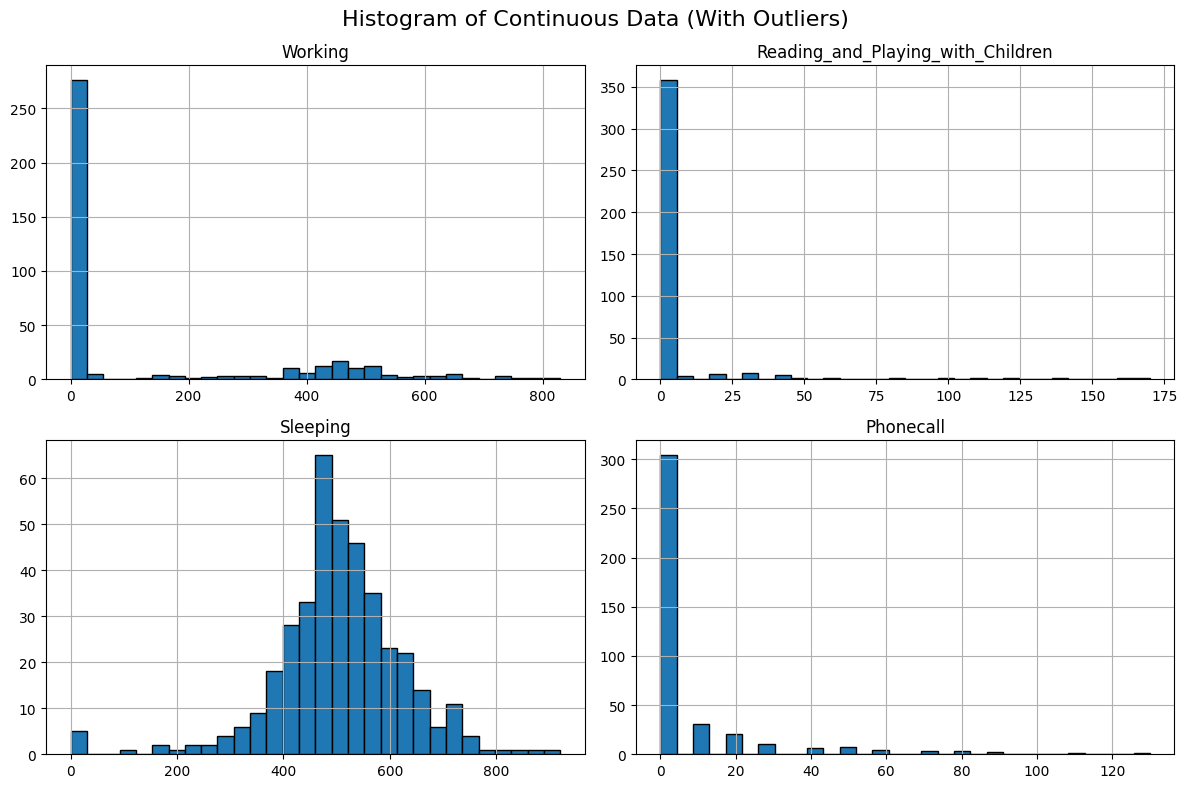

In [169]:
# Plot histograms for continuous columns
final_df[continuous_columns].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histogram of Continuous Data (With Outliers)", fontsize=16)
plt.tight_layout()
plt.show()

### Step 12: Creating boxplot for continuous variables (e.g., Working, Reading_and_Playing_with_Children, Sleeping, Phonecall)


<span style="color:green;">We constructed box plots here to see that where the most data exists and if any outliers exists to help us understand the data spread.</span>


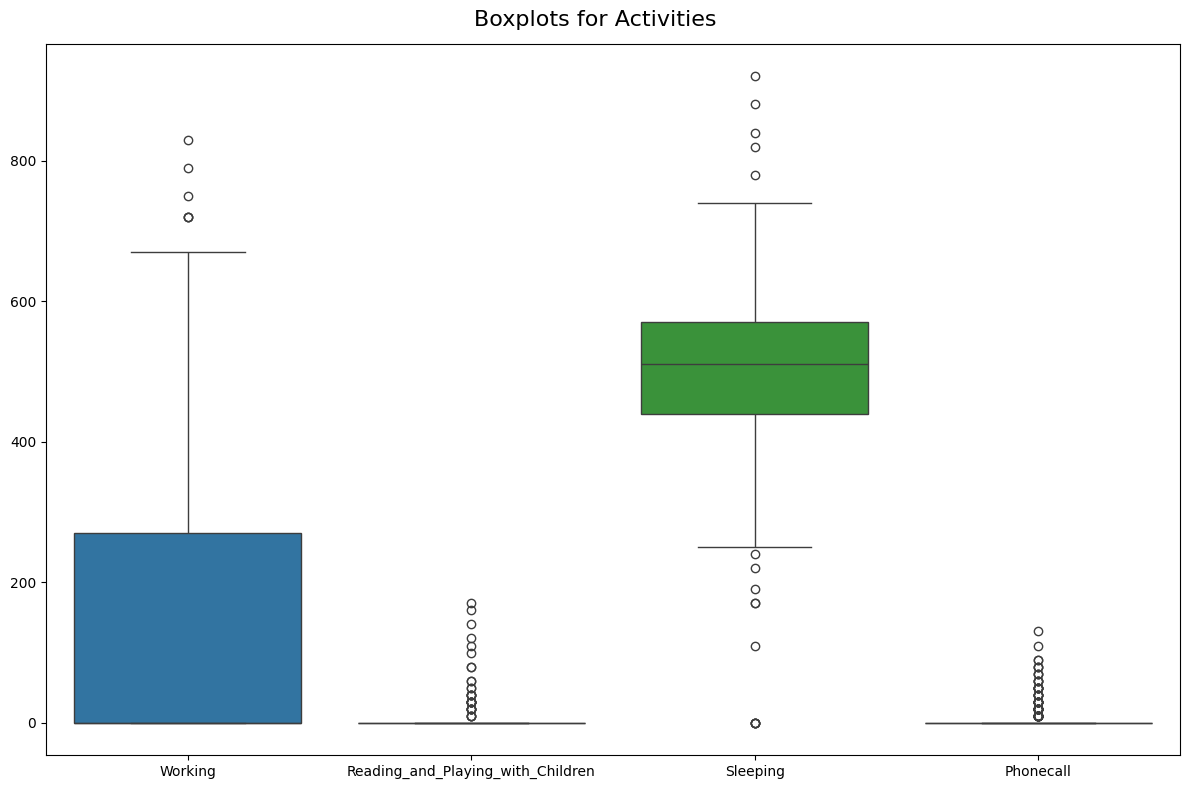

In [170]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_df[continuous_columns])
plt.suptitle("Boxplots for Activities", fontsize=16)
plt.tight_layout()
plt.show()

### Step 13: Bar charts for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)


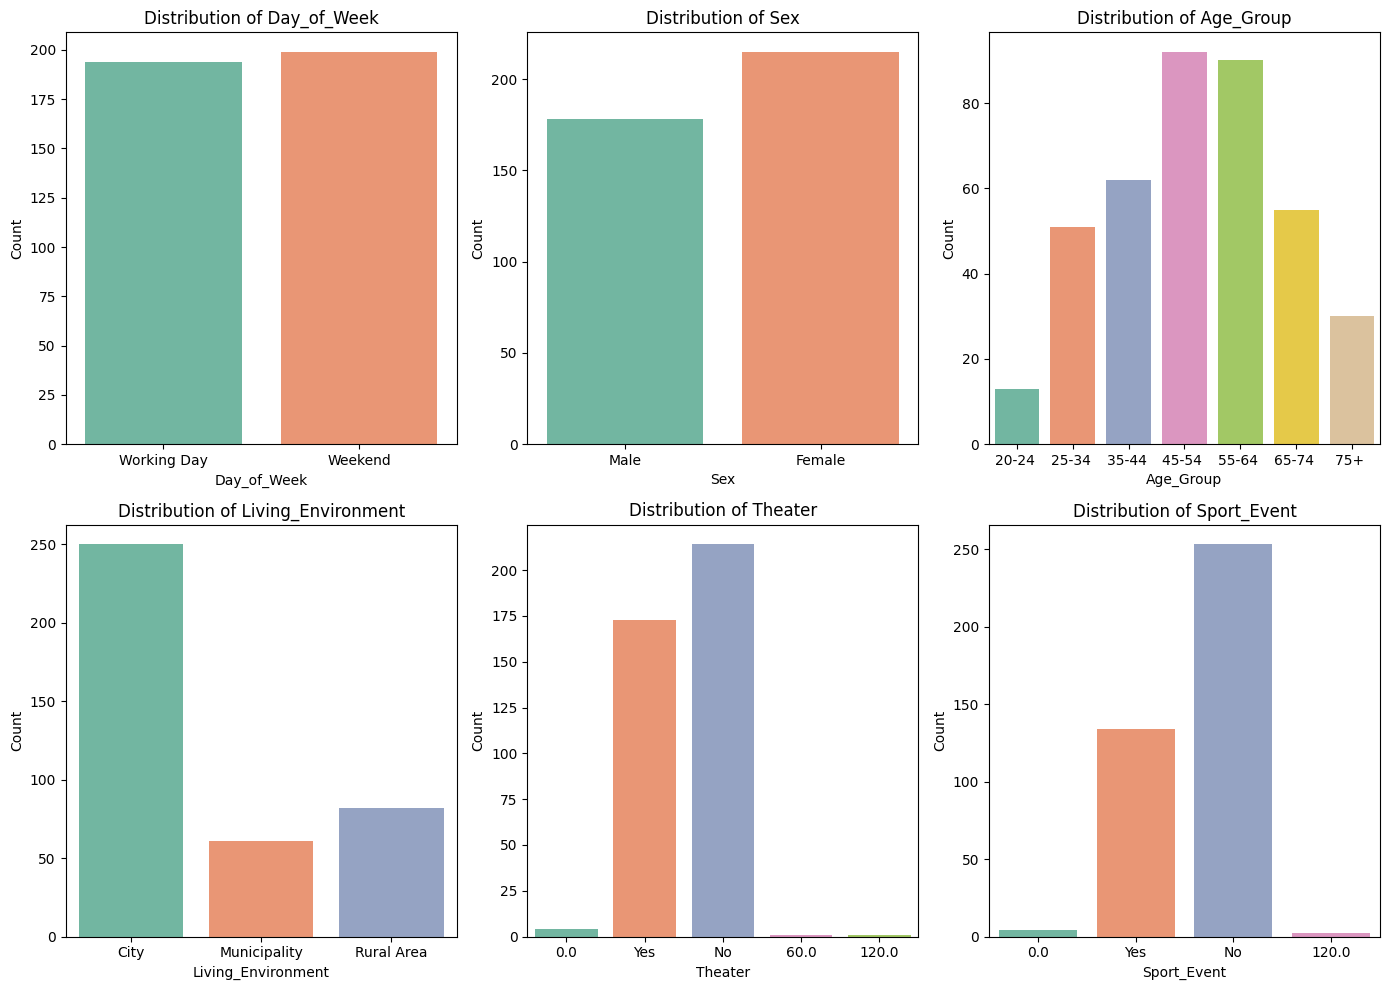

In [171]:
categorical_columns = ['Day_of_Week', 'Sex', 'Age_Group',
                       'Living_Environment', 'Theater', 'Sport_Event']

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column],
                  palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="color: green;">
In the above box plot, we can observe that the 'Theater' and 'Sport_Event' columns contain some outlier values, specifically 0.0, 60.0, and 120.0, which appear as extreme points on the plot. These values stand out from the rest of the data, suggesting that they may not accurately represent meaningful entries. The box plot visually highlights these anomalies, indicating that they likely result from data entry errors or other inconsistencies, which could affect the overall analysis and interpretation of these variables.


### Step 14: Dropping rows with invalid numerical values in 'Theater' and 'Sport_Event' (0.0, 60.0, 120.0) & (0.0,120.0)


In [172]:
final_df = final_df[~final_df['Theater'].isin([0.0, 60.0, 120.0])]
final_df = final_df[~final_df['Sport_Event'].isin([0.0, 120.0])]

### Step 15: Removing invalid categories of 'Theater' and 'Sport_Event'


In [173]:
final_df['Theater'] = final_df['Theater'].cat.remove_categories([
                                                                0.0, 60.0, 120.0])
final_df['Sport_Event'] = final_df['Sport_Event'].cat.remove_categories([
                                                                        0.0, 120.0])

### Step 16: Checking unique values after dropping invalid categories


In [174]:
print(final_df['Theater'].unique())
print(final_df['Sport_Event'].unique())

['Yes', 'No']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<div style="color: green;">
We removed the rows with invalid numerical values in the 'Theater' and 'Sport_Event' columns (specifically 0.0, 60.0, and 120.0) because these values do not seem to represent valid or meaningful information in the context of the dataset. The presence of such values likely indicates data entry errors or anomalies that could distort the analysis and lead to inaccurate conclusions. By excluding these invalid entries, I ensure that the dataset accurately reflects the intended values for these columns and maintain the integrity of the analysis moving forward.


### Step 17: Plotting Bar charts again for categorical variables (Day_of_Week, Sex, Age_Group, Living_Environment, Theater, Sport_Event)


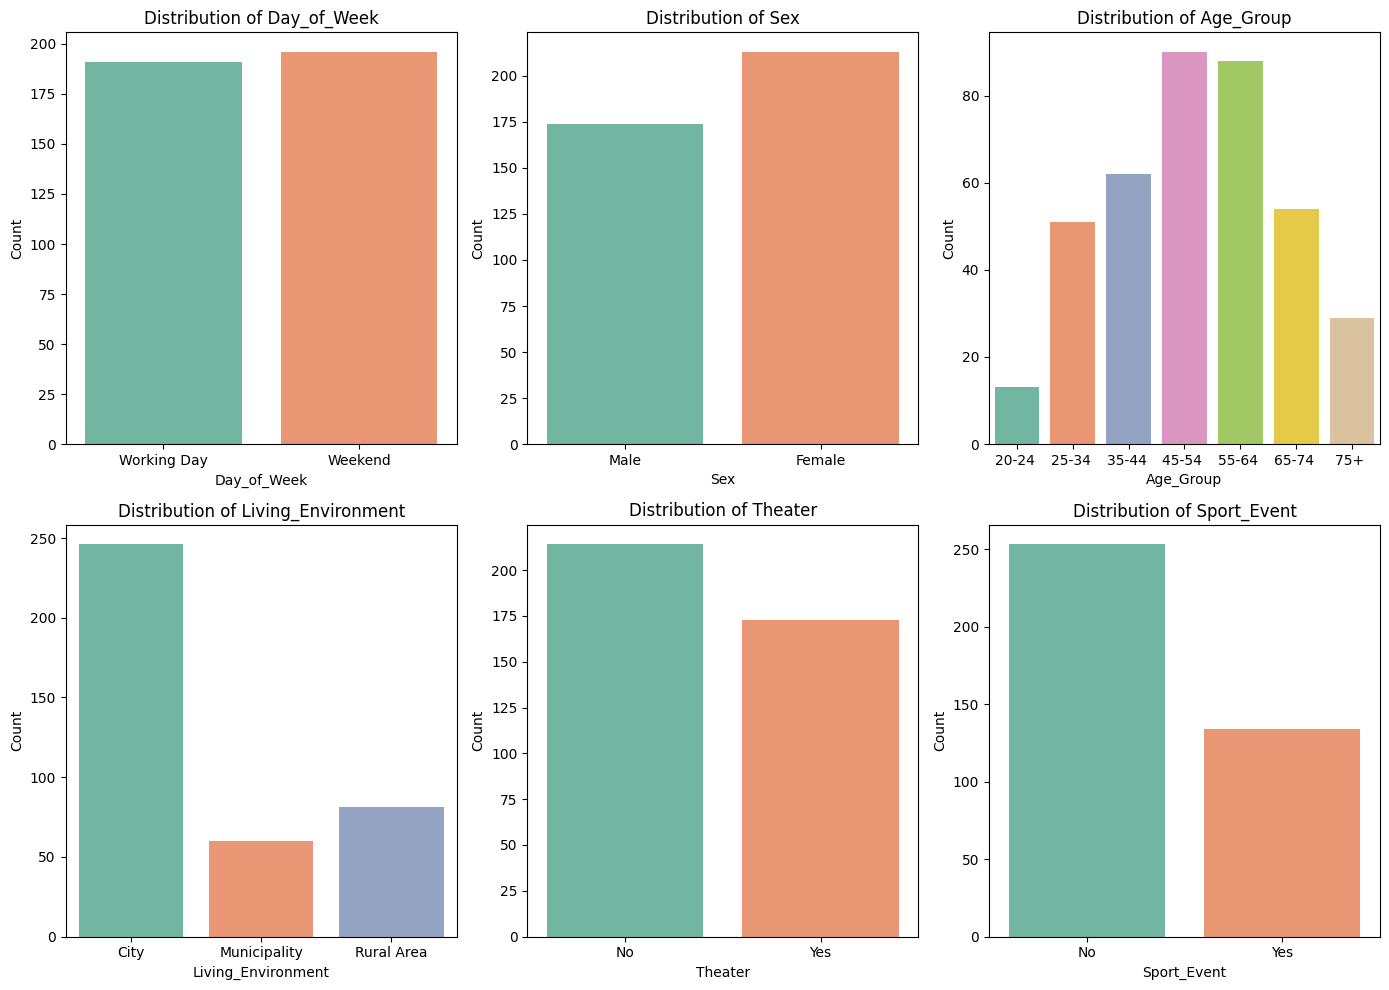

In [175]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=final_df[column], hue=final_df[column],
                  palette="Set2", legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2: Use of descriptive statistics


### Step 1: Selecting only numeric columns


In [176]:
numeric_columns = [
    'Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']

<div style="color: green;">
Since Household_ID and Member_ID both are identifiers so we will exclude these to and perform the normality testing on all the other columns with numeric type to see if the data is normally distributed or not. Based on the results of the tests, we will identify which statistical tests to opt for.


### Step 2: Descriptive statistics for numeric columns


In [177]:
final_df[numeric_columns].describe()

,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall
count,387.000000,387.000000,387.000000,387.000000
mean,126.279070,4.599483,504.754522,6.925065
std,215.992959,19.409209,123.502970,17.722737
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,440.000000,0.000000
50%,0.000000,0.000000,510.000000,0.000000
75%,250.000000,0.000000,570.000000,0.000000
max,830.000000,170.000000,920.000000,130.000000


### Step 3: Calculating skewness for numeric columns


In [178]:
final_df[numeric_columns].skew()

Working                              1.366545
Reading_and_Playing_with_Children    5.720520
Sleeping                            -0.731501
Phonecall                            3.490187
dtype: float64

### Step 4: Calculating kurtosis for numeric columns


In [179]:
final_df[numeric_columns].kurt()

Working                               0.362796
Reading_and_Playing_with_Children    36.932001
Sleeping                              3.349116
Phonecall                            13.978319
dtype: float64

### Step 5: For categorical columns, summarize their distribution


In [180]:
categorical_columns = ['Living_Environment', 'Theater', 'Sport_Event']
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(final_df[col].value_counts())
    print()

Value counts for Living_Environment:
Living_Environment
City            246
Rural Area       81
Municipality     60
Name: count, dtype: int64

Value counts for Theater:
Theater
No     214
Yes    173
Name: count, dtype: int64

Value counts for Sport_Event:
Sport_Event
No     253
Yes    134
Name: count, dtype: int64



### Task 1 - Characterise the individuals that are present in the data. Are there groups of similar persons?


1.1 First we will get the descriptive statistics and visualizations of the data set


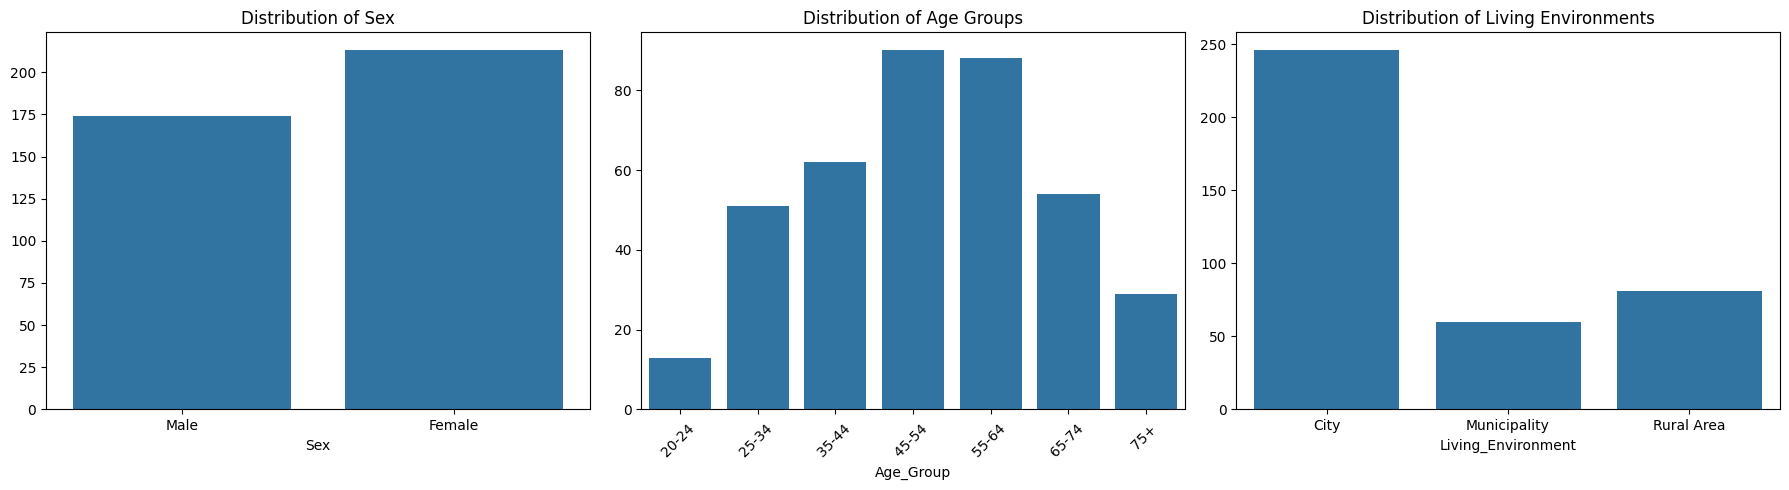

In [181]:
sex_counts = final_df['Sex'].value_counts()
age_group_counts = final_df['Age_Group'].value_counts()
living_env_counts = final_df['Living_Environment'].value_counts()

# Bar plots for each variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=axes[0])
axes[0].set_title('Distribution of Sex')
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Age Groups')
axes[1].tick_params(axis='x', rotation=45)
sns.barplot(x=living_env_counts.index, y=living_env_counts.values, ax=axes[2])
axes[2].set_title('Distribution of Living Environments')
plt.tight_layout()
plt.show()

<div style="color: green;">First, we analyzed the dataset by calculating and visualizing the distributions of key demographic variables: Sex, Age Group, and Living Environment. We counted the values for each variable to identify the most common categories and see how individuals are distributed across groups. Bar plots were created to make these patterns easier to understand. From the plots, we observed that females dominate in the Sex category, the 45-54 age group is the most common, and most individuals live in cities.


1.2. Now we will calculate distributions for each demographic variable


In [182]:
sex_distribution = final_df['Sex'].value_counts()
age_group_distribution = final_df['Age_Group'].value_counts()
living_env_distribution = final_df['Living_Environment'].value_counts()

print("\nSex Distribution:\n", sex_distribution)
print("\nAge Group Distribution:\n", age_group_distribution)
print("\nLiving Environment Distribution:\n", living_env_distribution)


Sex Distribution:
 Sex
Female    213
Male      174
Name: count, dtype: int64

Age Group Distribution:
 Age_Group
45-54     90
55-64     88
35-44     62
65-74     54
25-34     51
75+       29
20-24     13
Name: count, dtype: int64

Living Environment Distribution:
 Living_Environment
City            246
Rural Area       81
Municipality     60
Name: count, dtype: int64


<div style="color: green;">As per the output above, if we talk about the distribution of Sex, there are more females (213) than males (174), indicating a higher representation of women in the dataset. Similarly for Age Groups, the 45-54 years old group is the most common with 90 individuals, followed closely by the 55-64 years old group with 88 individuals, while younger age groups like 20-24 years old (13) and 75+ years old (29) are the least represented. Regarding Living Environment, the majority of individuals (246) reside in cities, with smaller proportions in rural areas (81) and municipalities (60).


1.3. Now we will calculate cross-tabulate reltionships between demographic variables


In [183]:
sex_age_crosstab = pd.crosstab(final_df['Sex'], final_df['Age_Group'])
sex_env_crosstab = pd.crosstab(final_df['Sex'], final_df['Living_Environment'])
age_env_crosstab = pd.crosstab(
    final_df['Age_Group'], final_df['Living_Environment'])

print("\nSex vs. Age Group:\n", sex_age_crosstab)
print("\nSex vs. Living Environment:\n", sex_env_crosstab)
print("\nAge Group vs. Living Environment:\n", age_env_crosstab)


Sex vs. Age Group:
 Age_Group  20-24   25-34   35-44   45-54   55-64   65-74   75+ 
Sex                                                            
Male            5      17      29      47      45      19    12
Female          8      34      33      43      43      35    17

Sex vs. Living Environment:
 Living_Environment  City  Municipality  Rural Area
Sex                                               
Male                 111            24          39
Female               135            36          42

Age Group vs. Living Environment:
 Living_Environment  City  Municipality  Rural Area
Age_Group                                         
20-24                  9             2           2
25-34                 33             8          10
35-44                 35             9          18
45-54                 52            15          23
55-64                 63            14          11
65-74                 34            10          10
75+                   20             2       

<div style="color: green;">The relationships between variables reveal interesting patterns in the dataset. When comparing Sex and Age Group, males dominate younger groups such as 20-24 years old, while females are more frequent in older groups like 65-74 years old and 75+ years old. In the Sex and Living Environment comparison, both males and females are primarily located in cities, but females slightly outnumber males in urban areas, while males are more represented in rural areas. Examining Age Group and Living Environment, individuals aged 45-54 years old and 55-64 years old are the most represented across all living environments, with the majority residing in cities. Meanwhile, younger groups, such as 20-24 years old, have minimal representation in rural areas and municipalities.


1.4. Now we will Identify dominant groups i.e most frequent combinations in our dataset


In [184]:
dominant_sex = sex_distribution.idxmax()
dominant_age_group = age_group_distribution.idxmax()
dominant_living_env = living_env_distribution.idxmax()

print(f"Dominant Sex: {dominant_sex}")
print(f"Dominant Age Group: {dominant_age_group}")
print(f"Dominant Living Environment: {dominant_living_env}")

Dominant Sex: Female
Dominant Age Group: 45-54 
Dominant Living Environment: City


<div style="color: green;">The dataset highlights Females as the dominant sex, with a higher representation compared to males. The 45-54 years old age group stands out as the largest, making it the most common age range. In terms of living environment, the majority of individuals reside in cities, which significantly outnumber those living in rural areas or municipalities.


### Task 2 - Estimating how much time on average households spend daily on each activity.


In [185]:
activity_columns = [
    "Working", "Reading_and_Playing_with_Children", "Sleeping", "Phonecall"]

# Separate data by day type
working_day_data = final_df[final_df["Day_of_Week"]
                            == "Working Day"][activity_columns]
weekend_data = final_df[final_df["Day_of_Week"] == "Weekend"][activity_columns]

# Calculate the mean for each activity by day type
working_day_means = working_day_data.mean()
weekend_means = weekend_data.mean()

# Apply 5:2 weighting to get the daily average for a 7-day week
weighted_average_time_per_activity = (
    working_day_means * 5 + weekend_means * 2) / 7

print("Average time spent daily on each activity (in minutes):")
print(weighted_average_time_per_activity)

Average time spent daily on each activity (in minutes):
Working                              121.214644
Reading_and_Playing_with_Children      5.470059
Sleeping                             500.286126
Phonecall                              7.078671
dtype: float64


#### Results - Task 2

<span style="color:green;"> Households spend an average of **121.21 minutes** (2 hours) working, **5.47 minutes** reading and playing with children, **500.28 minutes** (8.5 hours) sleeping, and **7.07 minutes** on phone calls daily.</span>


# 3: Use of estimation and statistical tests


### Step 1: Estimating Central Tendency and Dispersion


In [186]:
central_tendency_dispersion = final_df[numeric_columns].agg(
    ['mean', 'median', 'std', 'min', 'max', 'quantile'])
central_tendency_dispersion

,Working,Reading_and_Playing_with_Children,Sleeping,Phonecall
mean,126.279070,4.599483,504.754522,6.925065
median,0.000000,0.000000,510.000000,0.000000
std,215.992959,19.409209,123.502970,17.722737
min,0.000000,0.000000,0.000000,0.000000
max,830.000000,170.000000,920.000000,130.000000
quantile,0.000000,0.000000,510.000000,0.000000


### Step 2: Confidence Intervals (Estimation)


In [187]:
# 95% confidence interval for 'Working' column
working_data = final_df['Working']
mean_working = np.mean(working_data)
std_working = np.std(working_data, ddof=1)
n = len(working_data)

# Standard error of the mean
sem = std_working / np.sqrt(n)

# Confidence interval
confidence_interval = stats.t.interval(0.95, n-1, loc=mean_working, scale=sem)
print("95% Confidence Interval for 'Working' column:", confidence_interval)

95% Confidence Interval for 'Working' column: (np.float64(104.6918821861646), np.float64(147.8662573487191))


### Step 3: Check Normality of Numerical Variables


#### Step 3.1: Descriptive Statistics for Numerical Variables


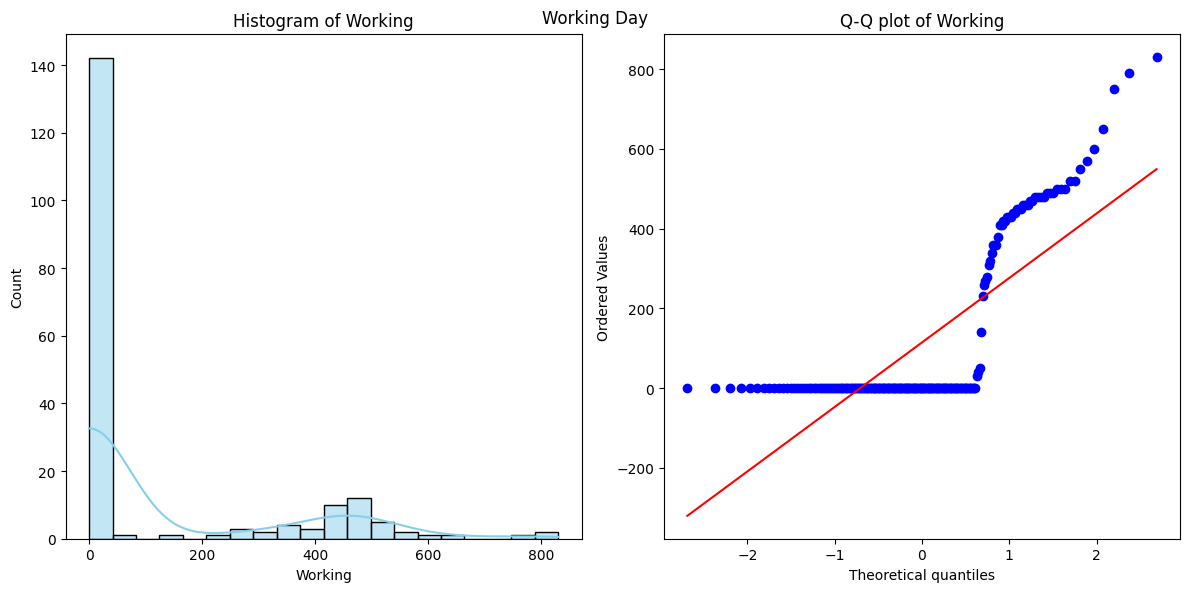

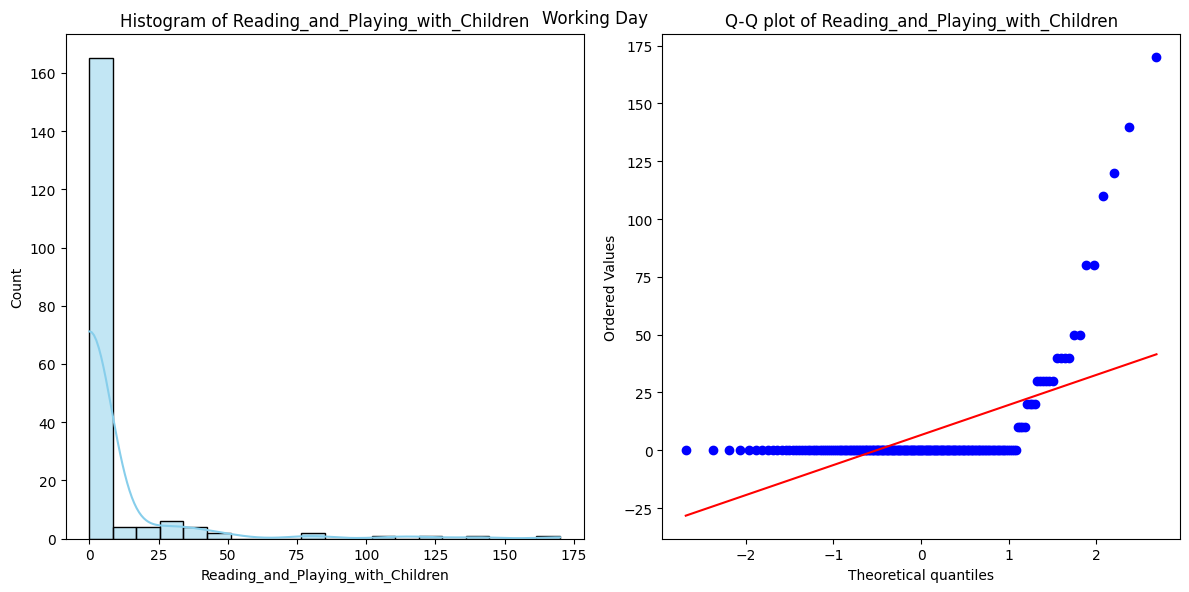

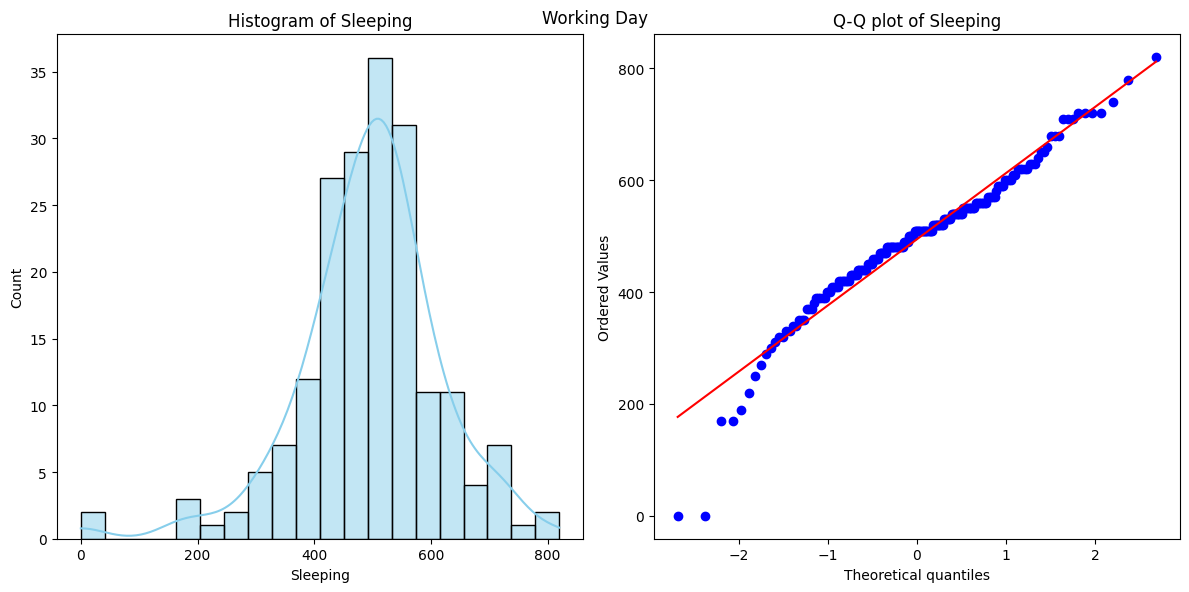

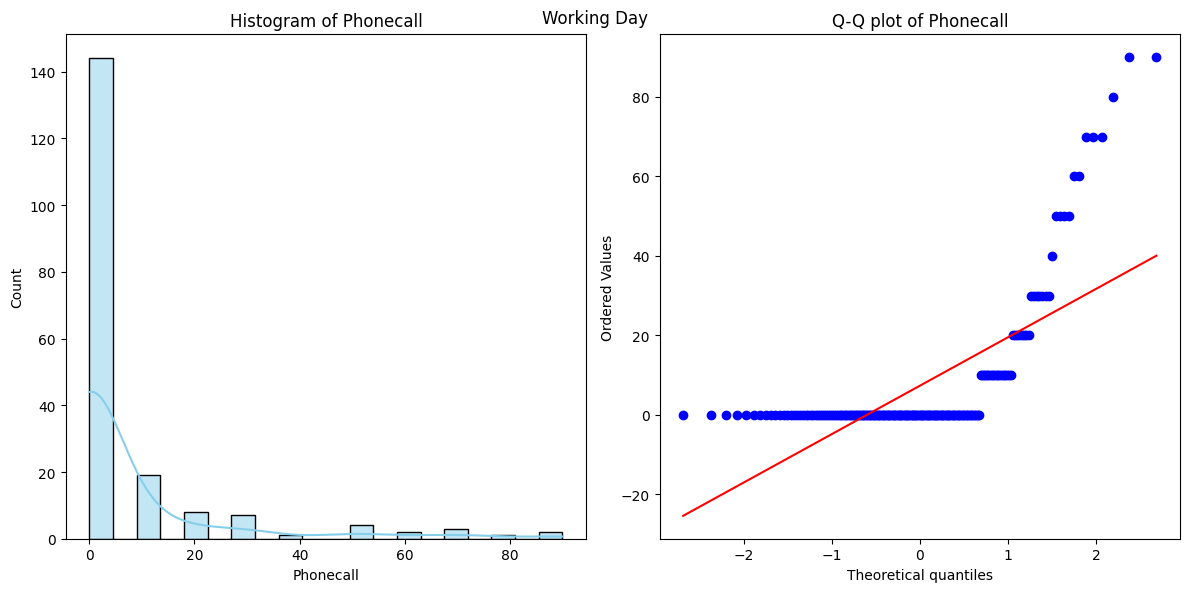

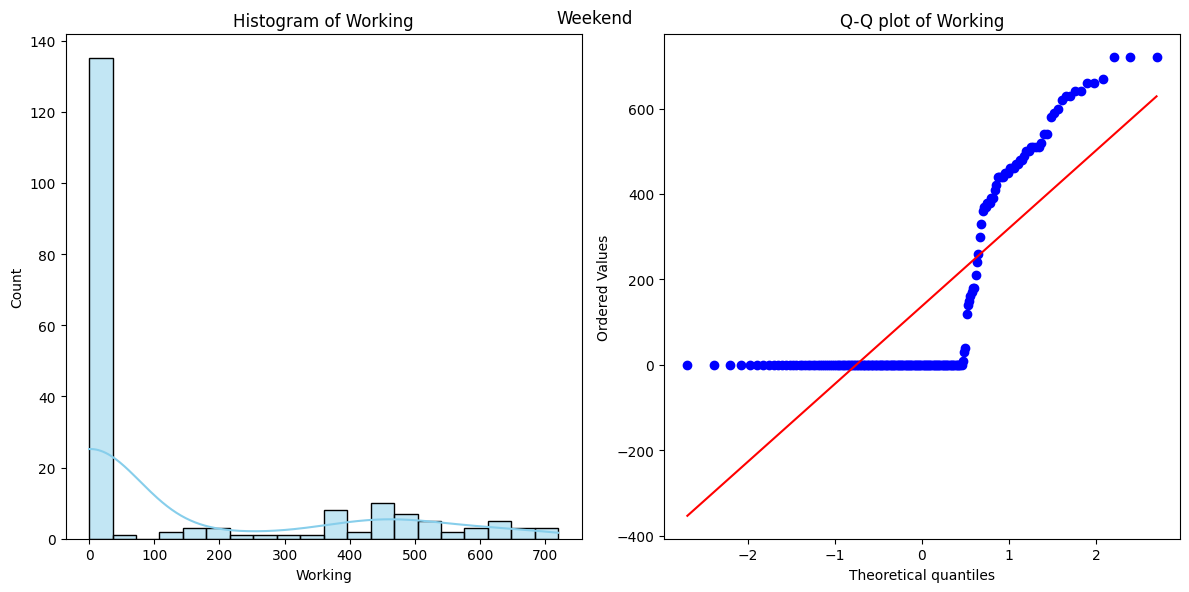

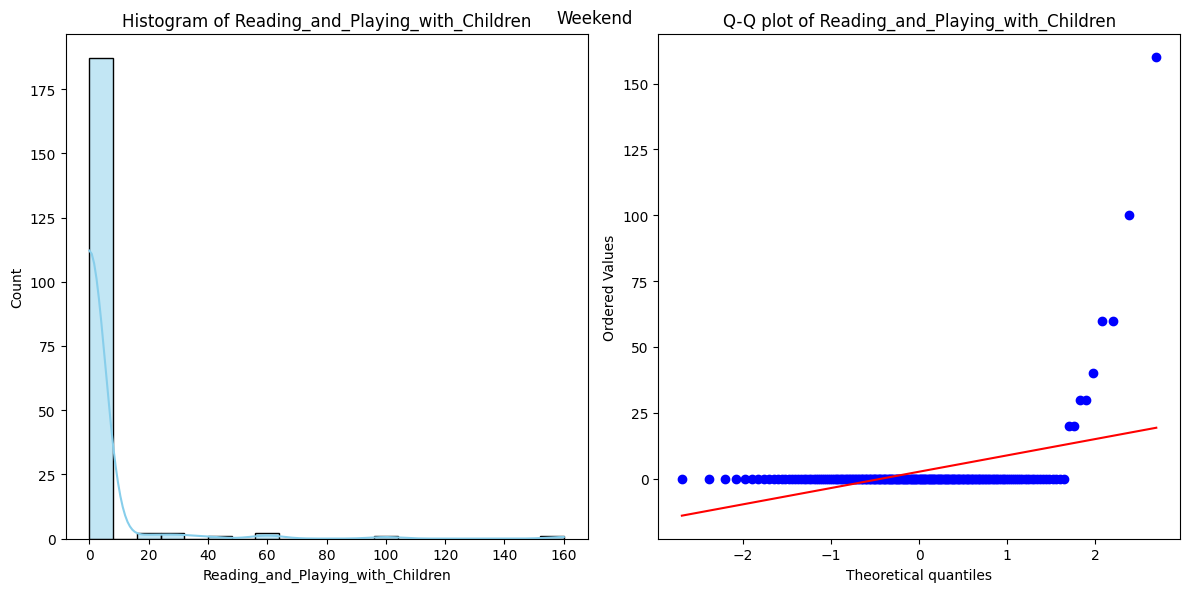

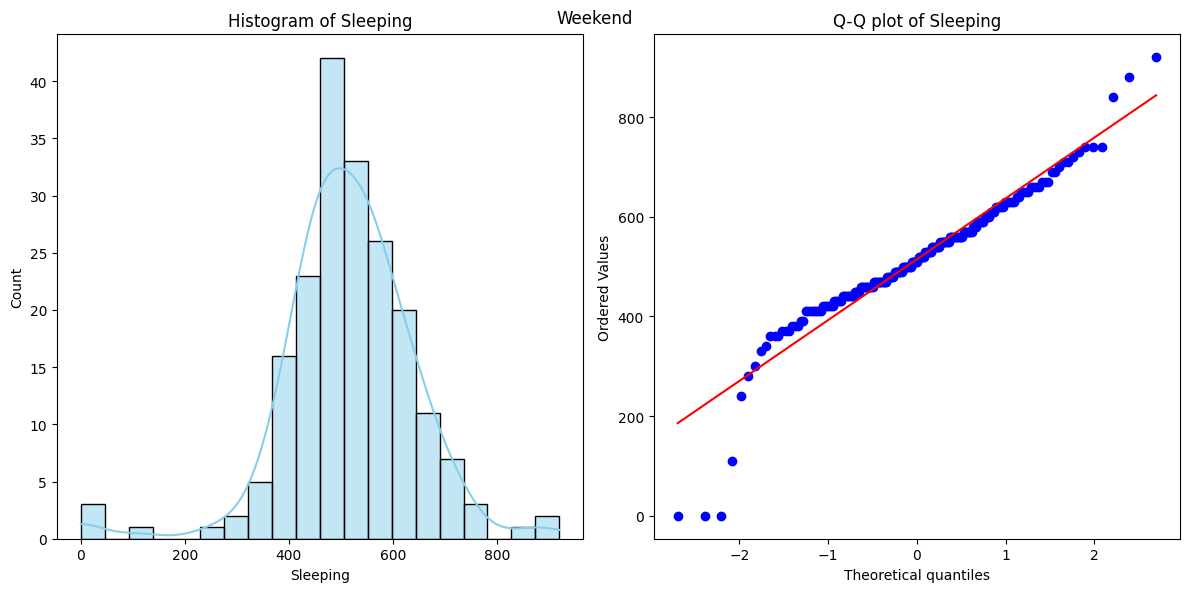

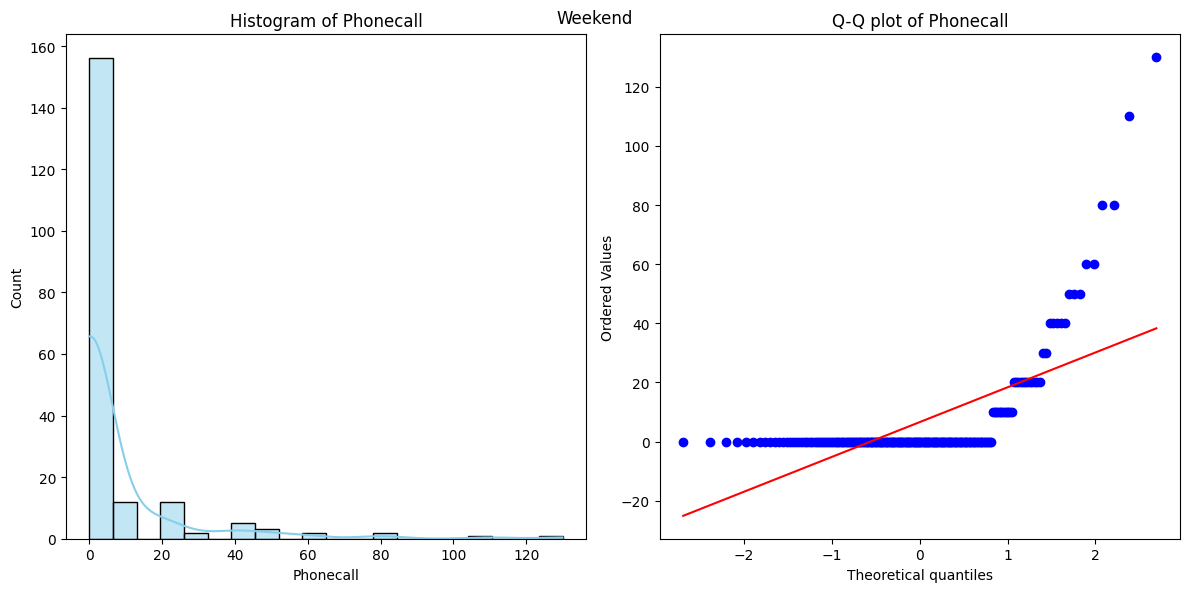

In [188]:
# Separate data by day type
working_day_data = final_df[final_df["Day_of_Week"] == "Working Day"]
weekend_data = final_df[final_df["Day_of_Week"] == "Weekend"]

# Visualizing the distribution with histograms and Q-Q plots for each numerical variable
for col in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(working_day_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(working_day_data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

    plt.tight_layout()
    plt.suptitle('Working Day')
    plt.show()

# Visualizing the distribution with histograms and Q-Q plots for each numerical variable
for col in numeric_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(weekend_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(weekend_data[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

    plt.tight_layout()
    plt.suptitle('Weekend')
    plt.show()

<span style="color:green;">The graphs display the distribution and normality of time spent on different activities, including Working, Reading and Playing with Children, Sleeping, and Phone Calls, on a working day. Below is the briefing about each variable plotted in the above histograms. <br><br>
<span style="color:green;">1. Working: The histogram shows a highly skewed distribution, with most individuals reporting little to no working hours, while a few record significantly high working times. The Q-Q plot confirms this skewness, indicating that the data does not follow a normal distribution. <br><br>
<span style="color:green;">2. Reading and Playing with Children: The histogram reveals that most people spend minimal time on this activity, with very few individuals devoting significant time. The Q-Q plot further shows heavy skewness, deviating from normality. <br><br>
<span style="color:green;">3. Sleeping: Unlike the previous activities, the histogram of sleeping time appears more normally distributed, forming a bell-shaped curve. The Q-Q plot supports this observation, as most points align with the red reference line, suggesting that sleep duration follows a near-normal distribution. <br><br>
<span style="color:green;">4. Phone Calls: The histogram indicates that the majority of individuals spend very little time on phone calls, with only a few reporting extended durations. The Q-Q plot confirms the skewed nature of the data, deviating significantly from the normal distribution.


### Task 3 - With respect to which activities do living environments differ?


In [189]:
activity_columns = [
    'Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']

final_df[activity_columns] = final_df[activity_columns].apply(
    pd.to_numeric, errors='coerce')

avg_time_by_env = final_df.groupby('Living_Environment', observed='false')[
    activity_columns].mean()
print(avg_time_by_env)

                       Working  Reading_and_Playing_with_Children    Sleeping  \
Living_Environment                                                              
City                118.983740                           4.634146  507.764228   
Municipality        122.666667                           6.166667  498.666667   
Rural Area          151.111111                           3.333333  500.123457   

                    Phonecall  
Living_Environment             
City                 7.642276  
Municipality         5.833333  
Rural Area           5.555556  


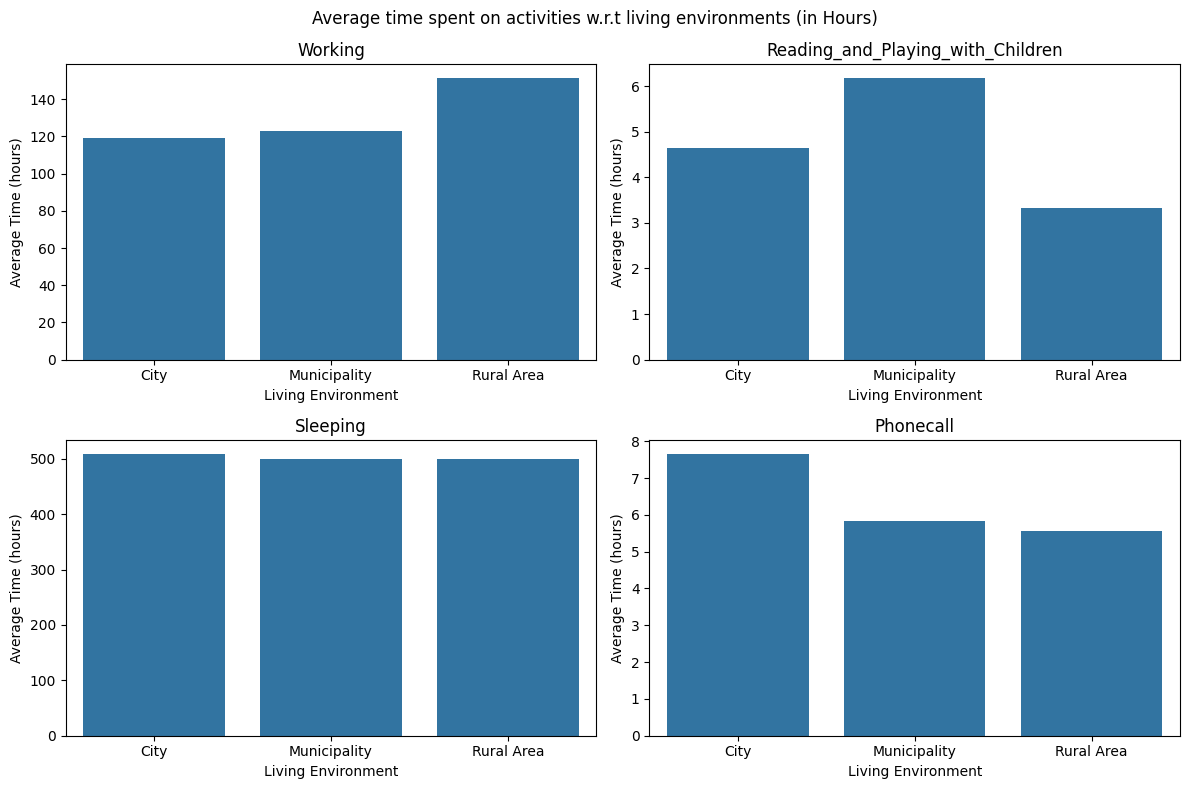

In [190]:
plt.figure(figsize=(12, 8))

for idx, activity in enumerate(activity_columns):
    plt.subplot(2, 2, idx + 1)
    sns.barplot(x=avg_time_by_env.index, y=avg_time_by_env[activity])
    plt.title(f'{activity}')
    plt.ylabel('Average Time (hours)')
    plt.xlabel('Living Environment')

plt.suptitle(
    "Average time spent on activities w.r.t living environments (in Hours)")
plt.tight_layout()
plt.show()

In [191]:
df_copy = final_df.copy()

# Converted 'Theater' and 'Sport_Event' to numeric (since they are categorical)
df_copy['Theater'] = df_copy['Theater'].apply(lambda x: 1 if x == 'Yes' else 0)
df_copy['Sport_Event'] = df_copy['Sport_Event'].apply(
    lambda x: 1 if x == 'Yes' else 0)

activity_columns = ['Theater', 'Sport_Event']

# Converting the activity columns to numeric
df_copy[activity_columns] = df_copy[activity_columns].apply(
    pd.to_numeric, errors='coerce')

avg_time_by_env_theater_sport = df_copy.groupby(
    'Living_Environment', observed=False)[activity_columns].mean()

# Convert the results to minutes
avg_time_by_env_theater_sport *= 60

print(avg_time_by_env_theater_sport)

                      Theater  Sport_Event
Living_Environment                        
City                27.317073    22.195122
Municipality        30.000000    20.000000
Rural Area          22.962963    17.037037


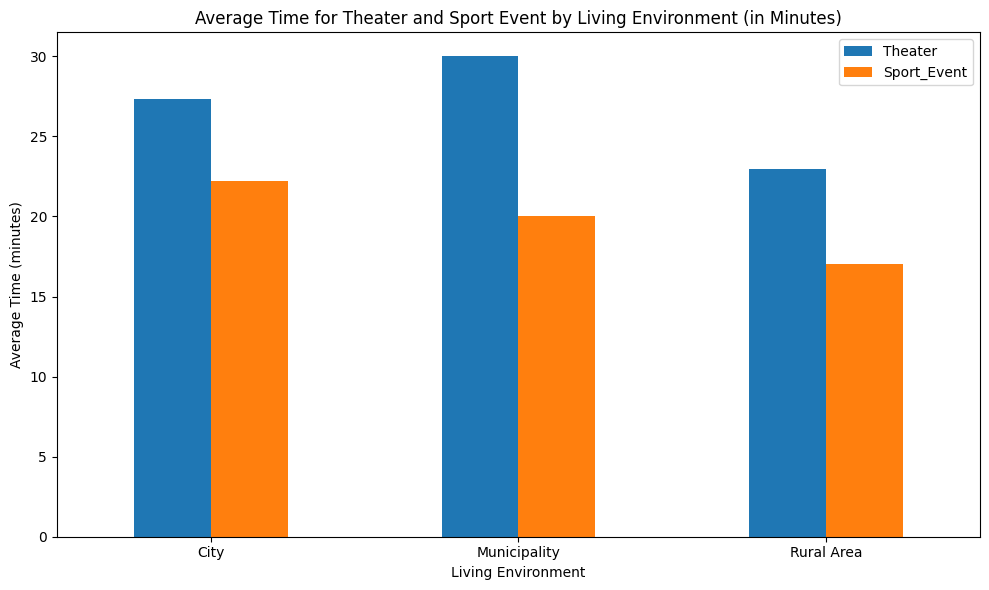

In [192]:
avg_time_by_env_theater_sport.plot(kind='bar', figsize=(10, 6))
plt.title(
    'Average Time for Theater and Sport Event by Living Environment (in Minutes)')
plt.xlabel('Living Environment')
plt.ylabel('Average Time (minutes)')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

<span style="color:green;">In this approach, first converted the activity columns 'Theater' and 'Sport_Event' to numeric values to handle any non-numeric entries, ensuring the data could be processed correctly. Later we grouped the data by 'Living_Environment' to analyze how different environments affect the time spent on activities. Since the time spent on these activities was typically low and measured in hours, I converted the results into minutes to make the data more readable.

### Task 3 - Results

<font color = green>The above plots illustrate how time spent on various activities differs across living environments. People in **rural areas** work the most, averaging around **150 hours**, compared to **130 hours** in municipalities and **125 hours** in cities. However, rural residents spend the least time on **reading and playing with children**, with just **3 hours**, while those in municipalities spend the most at **6 hours**, and city dwellers fall in between with **4.5 hours**. **Phone calls** are most common in cities, with around **7.5 hours**, whereas municipalities and rural areas see lower averages of **6 hours** and **5.5 hours**, respectively. **Sleeping time** remains consistent across all environments, averaging around **500 hours**. In cultural and recreational activities, people in municipalities spend the most time at **theater**, averaging **30 minutes**, while city dwellers follow at **27 minutes**, and rural residents at **24 minutes**. Similarly, **sport event participation** is highest in cities (**23 minutes**), slightly lower in municipalities (**22 minutes**), and lowest in rural areas (**18 minutes**). These differences highlight how rural areas emphasize work, municipalities foster family and cultural activities, and cities prioritize connectivity and entertainment.

### Task 4 - With respect to which activities do working days and weekends differ?


<span style="color:green;">As you can see in above histograms in section 3.1, there exists a large proportion of 0 values in the dataset for activities like "Working," "Reading_and_Playing_with_Children," and "Phonecall" which may also be due to other factors such as personal choice or lifestyle preferences. For example, some respondents may not engage in "Reading_and_Playing_with_Children" because they do not have children or have children who are grown up, and therefore no longer partake in this activity. So, including these 0 values could introduce non-comparable data points into the statistical analysis, skewing the results. To ensure that the analysis reflects active participation in the activities studied, we have decided to omit respondents reporting 0 for these activities on both working_day and on weekend, thereby improving the accuracy of the statistical tests.</span>


<span style="color:green;">So we planned to conduct a separate analysis for each activity.</span>


In [193]:
print("Household Length: ", final_df["Household_ID"].nunique())

Household Length:  387


<span style="color:green;">Since Household_ID is unique ( as it is equal to the number of entries that we have after cleaning the data ), so we can outer merge the data based on this column.
</span>


In [194]:
# Perform an outer merge
merged_data = pd.merge(working_day_data[['Household_ID', 'Working']], weekend_data[[
                       'Household_ID', 'Working']], on='Household_ID', how='outer', suffixes=('_working_day', '_weekend'))

merged_data.fillna(0, inplace=True)
merged_data['Household_ID'] = merged_data['Household_ID'].astype(
    int)  # Convert 'id' to int
merged_data['Working_working_day'] = merged_data['Working_working_day'].astype(
    int)
merged_data['Working_weekend'] = merged_data['Working_weekend'].astype(int)

merged_data = merged_data[(merged_data['Working_working_day'] != 0) | (
    merged_data['Working_weekend'] != 0)].reset_index(drop=True)

# Display the result
print(merged_data.dtypes)
print(merged_data)

# Applying Shapiro test for both - working_day and weekend
stat, p_value, = shapiro(merged_data["Working_working_day"])
print(
    f"Shapiro-Wilk Test for Working_working_day: stat={stat:.2f}, p-value={p_value:.2e}")

stat, p_value, = shapiro(merged_data["Working_weekend"])
print(
    f"Shapiro-Wilk Test for Working_weekend: stat={stat:.2f}, p-value={p_value:.2e}")

# based on the results, we can see that data is not normally distributed, so we will apply wilcoxon signed-rank test.
stat, p_value = wilcoxon(
    merged_data["Working_working_day"], merged_data["Working_weekend"])
print(f"Wilcoxon Signed-Rank Test: stat={stat:.2f}, p-value={p_value:.2e}")

Household_ID           int64
Working_working_day    int64
Working_weekend        int64
dtype: object
     Household_ID  Working_working_day  Working_weekend
0           50007                    0              580
1           50110                    0              540
2           50149                    0              180
3           50152                    0               10
4           50160                    0              170
..            ...                  ...              ...
109         51875                    0              180
110         51877                  490                0
111         51915                  450                0
112         51943                    0              440
113         51947                  490                0

[114 rows x 3 columns]
Shapiro-Wilk Test for Working_working_day: stat=0.75, p-value=1.35e-12
Shapiro-Wilk Test for Working_weekend: stat=0.81, p-value=7.40e-11
Wilcoxon Signed-Rank Test: stat=2867.00, p-value=2.46e-01


In [195]:
# Perform an outer merge
merged_data = pd.merge(working_day_data[['Household_ID', 'Reading_and_Playing_with_Children']], weekend_data[['Household_ID', 'Reading_and_Playing_with_Children']],
                       on='Household_ID', how='outer', suffixes=('_working_day', '_weekend'))

merged_data.fillna(0, inplace=True)
merged_data['Household_ID'] = merged_data['Household_ID'].astype(
    int)  # Convert 'id' to int
merged_data['Reading_and_Playing_with_Children_working_day'] = merged_data[
    'Reading_and_Playing_with_Children_working_day'].astype(int)
merged_data['Reading_and_Playing_with_Children_weekend'] = merged_data['Reading_and_Playing_with_Children_weekend'].astype(
    int)

merged_data = merged_data[(merged_data['Reading_and_Playing_with_Children_working_day'] != 0) | (
    merged_data['Reading_and_Playing_with_Children_weekend'] != 0)].reset_index(drop=True)
# Display the result
print(merged_data.dtypes)
print(merged_data)

# Applying Shapiro test for both - working_day and weekend
stat, p_value, = shapiro(
    merged_data["Reading_and_Playing_with_Children_working_day"])
print(f"Shapiro-Wilk Test for Reading_and_Playing_with_Children_working_day: stat={
      stat:.2f}, p-value={p_value:.2e}")

stat, p_value, = shapiro(
    merged_data["Reading_and_Playing_with_Children_weekend"])
print(f"Shapiro-Wilk Test for Reading_and_Playing_with_Children_weekend: stat={
      stat:.2f}, p-value={p_value:.2e}")

# based on the results, we can see that data is not normally distributed, so we will apply wilcoxon signed-rank test.
stat, p_value = wilcoxon(merged_data["Reading_and_Playing_with_Children_working_day"],
                         merged_data["Reading_and_Playing_with_Children_weekend"])
print(f"Wilcoxon Signed-Rank Test: stat={stat:.2f}, p-value={p_value:.2e}")

Household_ID                                     int64
Reading_and_Playing_with_Children_working_day    int64
Reading_and_Playing_with_Children_weekend        int64
dtype: object
    Household_ID  Reading_and_Playing_with_Children_working_day  \
0          50064                                             80   
1          50075                                             10   
2          50087                                              0   
3          50092                                              0   
4          50144                                            120   
5          50211                                              0   
6          50301                                             10   
7          50404                                             50   
8          50416                                              0   
9          50475                                             30   
10         50536                                             80   
11         50626 

In [196]:
# Perform an outer merge
merged_data = pd.merge(working_day_data[['Household_ID', 'Sleeping']], weekend_data[[
                       'Household_ID', 'Sleeping']], on='Household_ID', how='outer', suffixes=('_working_day', '_weekend'))

merged_data.fillna(0, inplace=True)
merged_data['Household_ID'] = merged_data['Household_ID'].astype(
    int)  # Convert 'id' to int
merged_data['Sleeping_working_day'] = merged_data['Sleeping_working_day'].astype(
    int)
merged_data['Sleeping_weekend'] = merged_data['Sleeping_weekend'].astype(int)

merged_data = merged_data[(merged_data['Sleeping_working_day'] != 0) | (
    merged_data['Sleeping_weekend'] != 0)].reset_index(drop=True)
# Display the result
print(merged_data.dtypes)
print(merged_data)

# Applying Shapiro test for both - working_day and weekend
stat, p_value, = shapiro(merged_data["Sleeping_working_day"])
print(
    f"Shapiro-Wilk Test for Sleeping_working_day: stat={stat:.2f}, p-value={p_value:.2e}")

stat, p_value, = shapiro(merged_data["Sleeping_weekend"])
print(
    f"Shapiro-Wilk Test for Sleeping_weekend: stat={stat:.2f}, p-value={p_value:.2e}")

# based on the results, we can see that data is not normally distributed, so we will apply wilcoxon signed-rank test.
stat, p_value = wilcoxon(
    merged_data["Sleeping_working_day"], merged_data["Sleeping_weekend"])
print(f"Wilcoxon Signed-Rank Test: stat={stat:.2f}, p-value={p_value:.2e}")

Household_ID            int64
Sleeping_working_day    int64
Sleeping_weekend        int64
dtype: object
     Household_ID  Sleeping_working_day  Sleeping_weekend
0           50007                     0               430
1           50009                   560                 0
2           50015                   450                 0
3           50032                   530                 0
4           50033                   440                 0
..            ...                   ...               ...
377         51923                     0               660
378         51943                     0               460
379         51947                   470                 0
380         51957                     0               740
381         51964                   550                 0

[382 rows x 3 columns]
Shapiro-Wilk Test for Sleeping_working_day: stat=0.77, p-value=1.31e-22
Shapiro-Wilk Test for Sleeping_weekend: stat=0.78, p-value=2.37e-22
Wilcoxon Signed-Rank Test: stat=3431

In [197]:
# Perform an outer merge
merged_data = pd.merge(working_day_data[['Household_ID', 'Phonecall']], weekend_data[[
                       'Household_ID', 'Phonecall']], on='Household_ID', how='outer', suffixes=('_working_day', '_weekend'))

merged_data.fillna(0, inplace=True)
merged_data['Household_ID'] = merged_data['Household_ID'].astype(
    int)  # Convert 'id' to int
merged_data['Phonecall_working_day'] = merged_data['Phonecall_working_day'].astype(
    int)
merged_data['Phonecall_weekend'] = merged_data['Phonecall_weekend'].astype(int)

merged_data = merged_data[(merged_data['Phonecall_working_day'] != 0) | (
    merged_data['Phonecall_weekend'] != 0)].reset_index(drop=True)
# Display the result
print(merged_data.dtypes)
print(merged_data)

# Applying Shapiro test for both - working_day and weekend
stat, p_value, = shapiro(merged_data["Phonecall_working_day"])
print(
    f"Shapiro-Wilk Test for Phonecall_working_day: stat={stat:.2f}, p-value={p_value:.2e}")

stat, p_value, = shapiro(merged_data["Phonecall_weekend"])
print(
    f"Shapiro-Wilk Test for Phonecall_weekend: stat={stat:.2f}, p-value={p_value:.2e}")

# based on the results, we can see that data is not normally distributed, so we will apply wilcoxon signed-rank test.
stat, p_value = wilcoxon(
    merged_data["Phonecall_working_day"], merged_data["Phonecall_weekend"])
print(f"Wilcoxon Signed-Rank Test: stat={stat:.2f}, p-value={p_value:.2e}")

Household_ID             int64
Phonecall_working_day    int64
Phonecall_weekend        int64
dtype: object
    Household_ID  Phonecall_working_day  Phonecall_weekend
0          50045                     50                  0
1          50075                     10                  0
2          50111                      0                 50
3          50144                     20                  0
4          50148                     10                  0
..           ...                    ...                ...
82         51862                     10                  0
83         51873                     10                  0
84         51947                     10                  0
85         51956                     50                  0
86         51957                      0                 40

[87 rows x 3 columns]
Shapiro-Wilk Test for Phonecall_working_day: stat=0.72, p-value=1.73e-11
Shapiro-Wilk Test for Phonecall_weekend: stat=0.65, p-value=5.15e-13
Wilcoxon Signed-Rank

Chi-squared Test: Chi2 stat=0.00, p-value=0.98
There is no significant association between 'Day_of_Week' and 'Theater'.


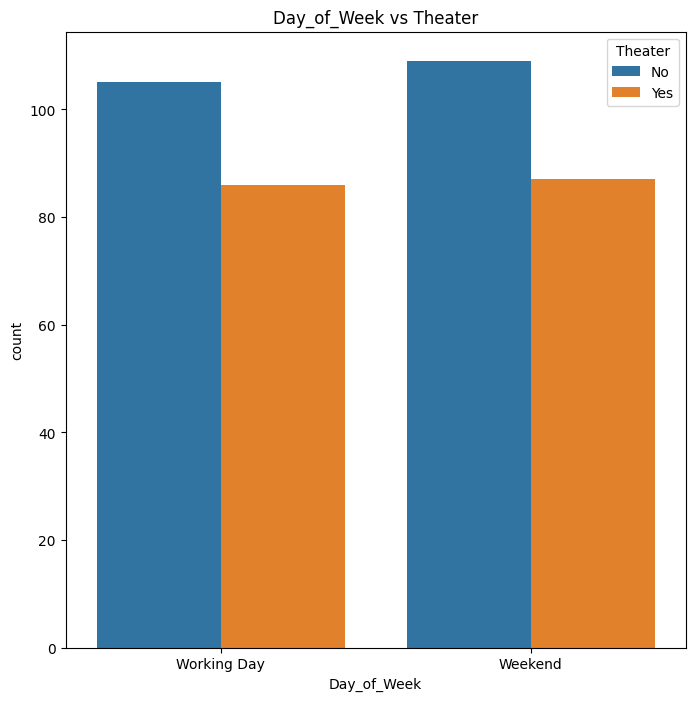

In [198]:
contingency_table = pd.crosstab(final_df['Day_of_Week'], final_df['Theater'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Day_of_Week' and 'Theater'.")
else:
    print("There is no significant association between 'Day_of_Week' and 'Theater'.")

plt.figure(figsize=(8, 8))
sns.countplot(x='Day_of_Week', hue='Theater', data=final_df)
plt.title('Day_of_Week vs Theater')
plt.show()

Chi-squared Test: Chi2 stat=0.32, p-value=0.57
There is no significant association between 'Day_of_Week' and 'Sport_Event'.


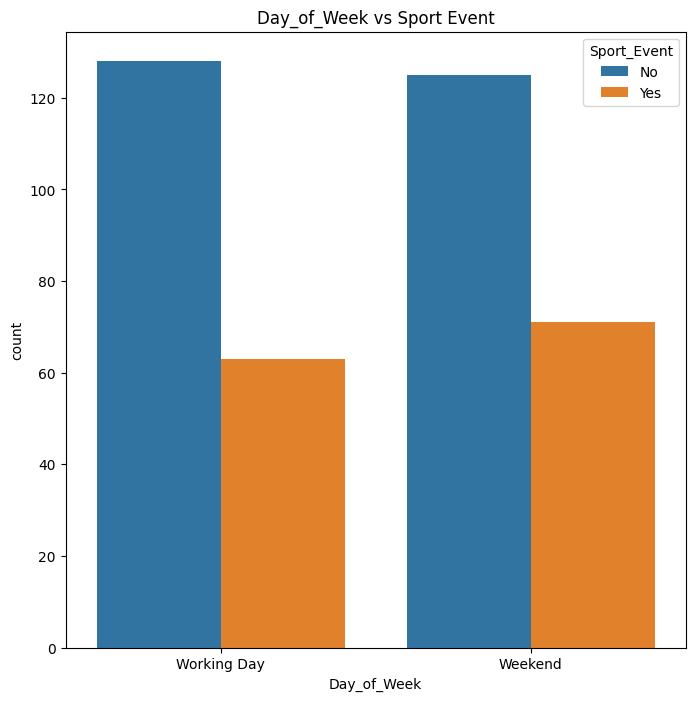

In [199]:
contingency_table = pd.crosstab(
    final_df['Day_of_Week'], final_df['Sport_Event'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 stat={chi2_stat:.2f}, p-value={p_value:.2f}")

if p_value < 0.05:
    print("There is a significant association between 'Day_of_Week' and 'Sport_Event'.")
else:
    print("There is no significant association between 'Day_of_Week' and 'Sport_Event'.")

plt.figure(figsize=(8, 8))
sns.countplot(x='Day_of_Week', hue='Sport_Event', data=final_df)
plt.title('Day_of_Week vs Sport Event')
plt.show()

#### Task 4 - Results

<span style="color:green;">After running the necessary tests, our analysis shows that **Reading and Playing with Children (p = 0.0287)** had a noticeable difference between weekdays and weekends, meaning people were more likely to do this activity on certain days. However, there was no significant difference in the activities of **Working (p = 0.246)**, **Sleeping (p = 0.295)**, and **Phonecall (p = 0.681)**, meaning these activities stayed the same on both weekdays and weekends. For places, there was also no big difference in **Theater (p = 0.98)** and **Sport Event (p = 0.57)**, meaning people visited these places similarly during both weekdays and weekends.</span>


#### Step 3.2: Shapiro-Wilk test for normality on numerical variables


##### Checking normality of numerical variables


In [200]:
for col in numeric_columns:
    stat, p_value = shapiro(final_df[col].dropna())
    print(
        f"Shapiro-Wilk Test for {col}: stat={stat:.2f}, p-value={p_value:.2f}")
    if p_value > 0.05:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does NOT follow a normal distribution.")

Shapiro-Wilk Test for Working: stat=0.63, p-value=0.00
Working does NOT follow a normal distribution.
Shapiro-Wilk Test for Reading_and_Playing_with_Children: stat=0.26, p-value=0.00
Reading_and_Playing_with_Children does NOT follow a normal distribution.
Shapiro-Wilk Test for Sleeping: stat=0.94, p-value=0.00
Sleeping does NOT follow a normal distribution.
Shapiro-Wilk Test for Phonecall: stat=0.46, p-value=0.00
Phonecall does NOT follow a normal distribution.


### Task 5: Which Activities are Associated with Each Other?

<span style="color:green;">

To properly analyze associations between activities, We are implementing the following steps for the numerical variables:

- We will use Spearman’s Rank Correlation instead of Pearson’s correlation because our data is not normally distributed (as per the Shapiro-Wilk test results).
- We will focus on numeric activity columns: Working, Reading & Playing with Children, Sleeping, Phone Calls.
- Compute the correlation matrix using Spearman’s method to determine the strength and direction of relationships.
  </span>


#### Step 3.3 - Apply Spearmans Correlation and visualise using heatmap

<span style="color:green;">
The correlation matrix will be visualized using a heatmap, allowing us to observe strong or weak associations between activities.
The heatmap will highlight:

- Strong positive correlation (closer to +1) - indicates activities that frequently occur together.
- Strong negative correlation (closer to -1) - indicates activities that rarely occur together.
- No correlation (~0) - indicates no significant association.
  </span>


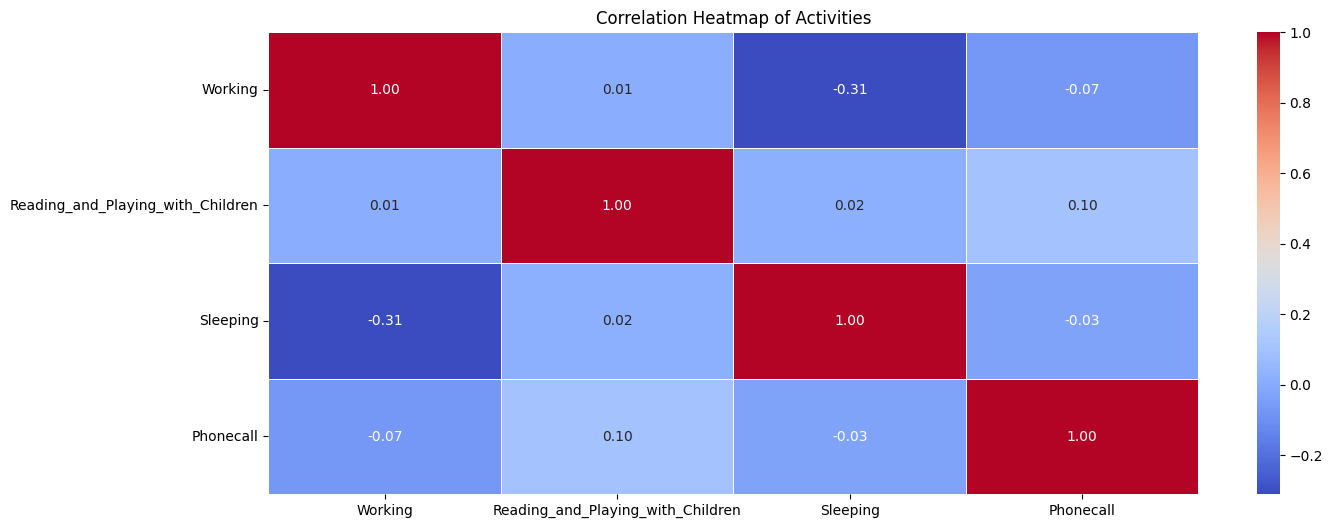

In [201]:
# Implementing Spearman's Correlation
# Selecting relevant numeric activity columns
activity_columns = [
    'Working', 'Reading_and_Playing_with_Children', 'Sleeping', 'Phonecall']
correlation_matrix = final_df[activity_columns].corr(method='spearman')

# Plotting a heatmap for visualization
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Activities")
plt.show()

<span style="color:green;">

#### Summary of the above numerical activities analysis:

- Working vs Sleeping (-0.31):
  There is a moderate negative correlation between working and sleeping. This suggests that individuals who work more tend to sleep less, which is an expected relationship.
- Reading and Playing with Children vs Other Activities:
  There is a minimal correlation between reading and playing with children and other activities (values close to 0). This indicates that the time spent on this activity is independent of working, sleeping, or making phone calls.
- Phone Calls vs Other Activities:
  It has negligible correlation with all other activities. This suggests that the number of phone calls made does not significantly impact the time spent working, sleeping, or playing with children.

In conclusion the only notable relationship is the **negative correlation between working and sleeping**. As work hours increase, sleep duration tends to decrease.All the other activities do not show strong associations with each other, indicating that they are likely performed independently and not together
</span>


#### Step 3.4 - Analyzing Associations Between Categorical Activities

<span style="color:green;">
For the categorical variables we canot directly use correlation metrics like Spearman, since they are designed for numerical data. Instead, we will use Chi-Squared Tests to determine if there is a significant association between different categorical activities.
<br/>
<br/>
Chi-Squared Test for Independence:

- This test determines whether two categorical variables are statistically dependent or independent.
- If the p-value < 0.05, we conclude that there is a significant association between the two activities.
  </span>


Chi-Square Test between **Day_of_Week** and **Theater**
Chi2 Statistic: 0.00, p-value: 0.9808



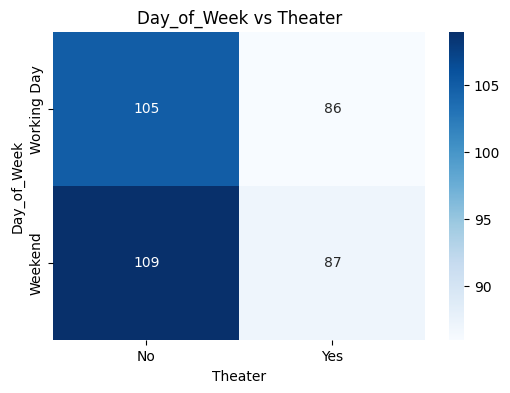

No significant association found between Day_of_Week and Theater.

Chi-Square Test between **Day_of_Week** and **Sport_Event**
Chi2 Statistic: 0.32, p-value: 0.5735



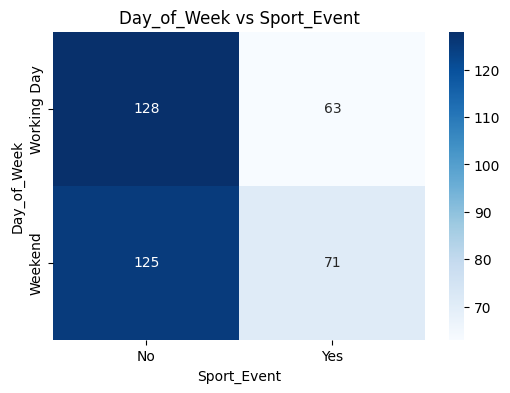

No significant association found between Day_of_Week and Sport_Event.

Chi-Square Test between **Sex** and **Sport_Event**
Chi2 Statistic: 12.18, p-value: 0.0005



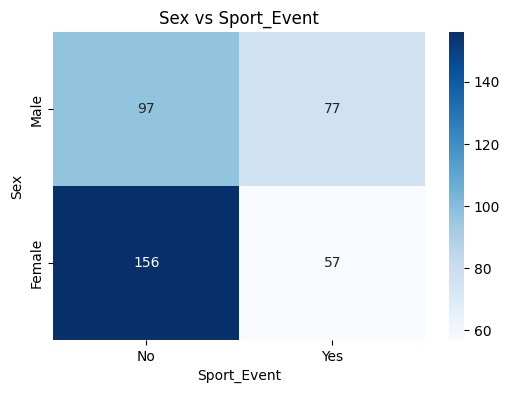

**Significant association** found between Sex and Sport_Event.

Chi-Square Test between **Living_Environment** and **Theater**
Chi2 Statistic: 2.10, p-value: 0.3492



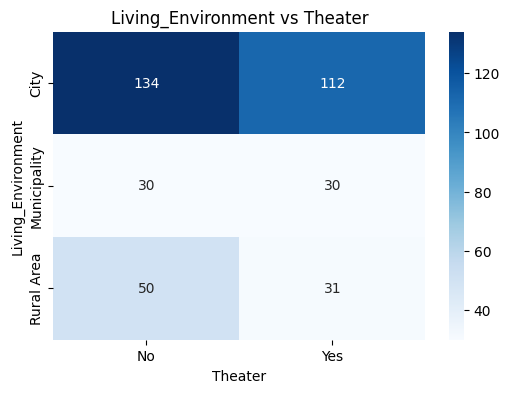

No significant association found between Living_Environment and Theater.



In [221]:
# Define categorical variable pairs to test associations
categorical_pairs = [
    ('Day_of_Week', 'Theater'),
    ('Day_of_Week', 'Sport_Event'),
    ('Sex', 'Sport_Event'),
    ('Living_Environment', 'Theater')
]


def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(
        contingency_table)

    print(f"Chi-Square Test between **{col1}** and **{col2}**")
    print(f"Chi2 Statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt='d')
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

    if p_value < 0.05:
        print(
            f"**Significant association** found between {col1} and {col2}.\n")
    else:
        print(f"No significant association found between {col1} and {col2}.\n")


# Apply to each categorical pair
for col1, col2 in categorical_pairs:
    chi_square_test(final_df, col1, col2)

<span style="color:green;">

#### Summary of the above categorical activities analysis:

- Sex vs. Sport Event:
  A **significant association** was found between gender and participation in sports events. One of the reasons for this correlation can be that males and females do not attend sports events at the same rate. There is a visible difference in participation based on gender.
- Living Environment vs. Theater:
  No significant association was found between where people live and attending the theater. Whether a person lives in a city, municipality, or rural area does not seem to impact their theater attendance
- Day of the Week vs. Theater:
  No significant association was found. People can visit the theater on a working day or the weekend
- Day of the Week vs. Sport Event:
  No significant association was found. Attending sports events appears to be evenly distributed across working days and weekends.

The results suggest that personal preference, availability, or social factors may influence participation in these activities more than environmental or time-based factors.
</span>


#### Step 3.5: Kruskal-Wallis Test


##### Performing Kruskal-Wallis test when the data is not normally distributed and visualizing the results.

<span style="color:green;">
The Kruskal-Wallis Test was conducted to examine whether there is a significant difference in the Age Groups across different Living Environments (City, Municipality, Rural Area).
</span>


Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat=0.83, p-value=0.6596
There is no significant difference between Age Groups across Living Environments.


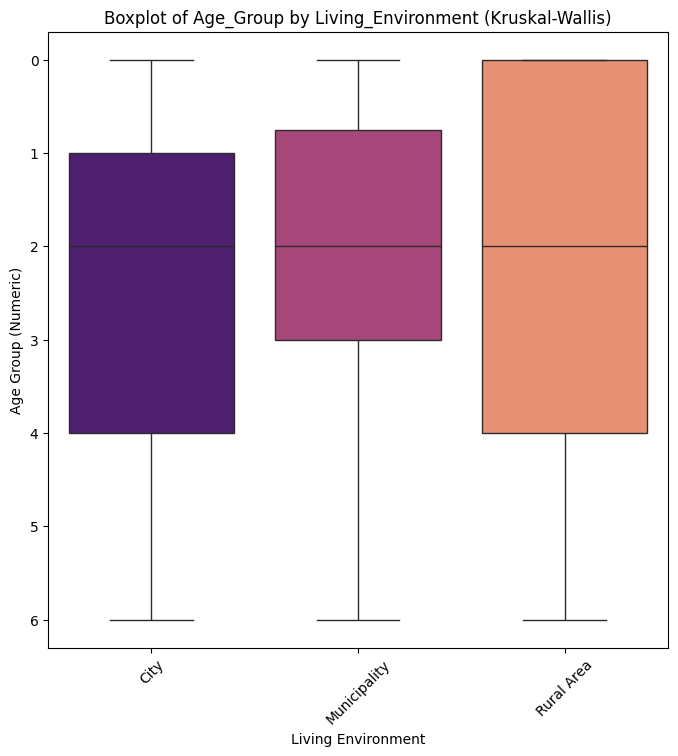

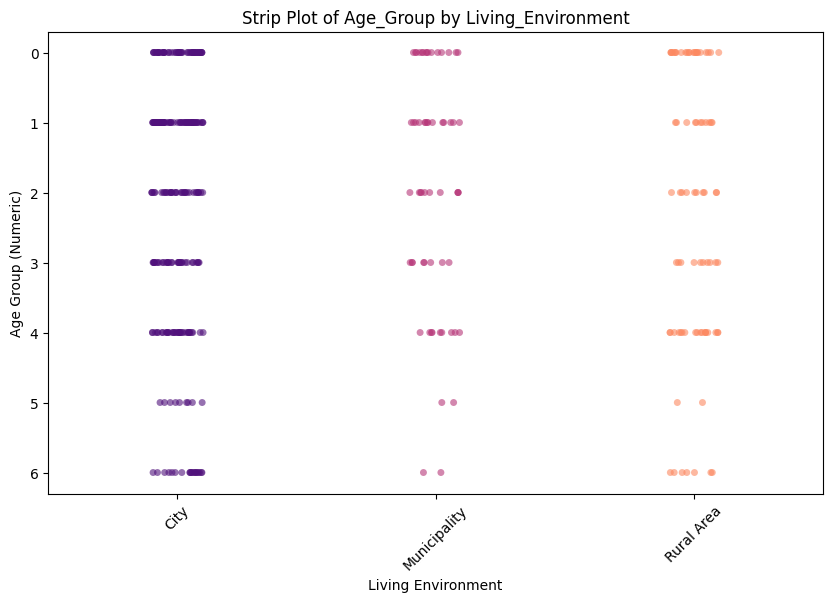

In [217]:
# Convert 'Age_Group' to numeric values for Kruskal-Wallis test
age_mapping = {age: idx for idx, age in enumerate(
    final_df['Age_Group'].unique())}
final_df['Age_Group_Num'] = final_df['Age_Group'].map(age_mapping)

grouped = [final_df[final_df['Living_Environment'] == group]['Age_Group_Num'].dropna()
           for group in final_df['Living_Environment'].unique()]

# Apply Kruskal-Wallis Test
h_stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test between Age_Group and Living_Environment: H-stat={
      h_stat:.2f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference between Age Groups across Living Environments.")
else:
    print("There is no significant difference between Age Groups across Living Environments.")

# Visualizing using Boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x='Living_Environment', y='Age_Group_Num',
            data=final_df, palette="magma",     hue='Living_Environment',    legend=False)
plt.title('Boxplot of Age_Group by Living_Environment (Kruskal-Wallis)')
plt.xlabel('Living Environment')
plt.ylabel('Age Group (Numeric)')
plt.xticks(rotation=45)
plt.show()

# Visualizing using strip plot - trying a new graph
plt.figure(figsize=(10, 6))
sns.stripplot(x='Living_Environment', y='Age_Group_Num',
              data=final_df, jitter=True, alpha=0.6, palette="magma", hue='Living_Environment', legend=False)
plt.title('Strip Plot of Age_Group by Living_Environment')
plt.xlabel('Living Environment')
plt.ylabel('Age Group (Numeric)')
plt.xticks(rotation=45)
plt.show()

<span style="color:green;">

#### Summary of Kruskal-Wallis Test for Age Group and Living Environment

The Kruskal-Wallis Test was conducted to examine whether there is a significant difference in the Age Groups across different Living Environments (City, Municipality, Rural Area).

- The p-value (0.6596) is much greater than 0.05, which means we fail to reject the null hypothesis. This indicates that there is no significant difference in the distribution of Age Groups across different Living Environments (City, Municipality, Rural Area). In simpler words, people from different age groups are evenly distributed across living environments, with no substantial variations.

- The box plot confirms this, as the median age groups and the spread (IQR) are fairly similar across all three environments. The strip plot shows a scattered distribution of individuals across all environments, further supporting the statistical result.

</span>


#### Task 5 - Results - Which Activities are Associated with Each Other?

<span style="color:green;">

Based on the analysis of both numerical and categorical variables/activities, we find the following associations:

1. Working and Sleeping show a **moderate negative correlation (-0.31)**, indicating that individuals who work more tend to sleep less.
2. Sex and Participation in Sports Events have a **significant association**, suggesting that males and females attend sports events at different rates.
3. All other activities (e.g., Reading & Playing with Children, Phone Calls, Theater Attendance, and Sports Events) show **no strong associations**, meaning they are performed independently of other factors such as day of the week or living environment.
4. Age Groups are evenly distributed across Living Environments, showing no significant differences in where different age groups live.

In conclusion, the only notable associations are the negative relationship between working and sleeping and the gender-based differences in sports event participation. All other activities appear to be independent, with no strong relationships between them.
</span>
